In [ ]:
from __future__ import print_function, division

import os
import math
import time
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn import preprocessing
from scipy.optimize import curve_fit 
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Problem 1

### 1.1a

**Target dataset: Aircraft**

*Description*: The data contains images of different kinds of aircrafts and their current state, whether flying or on land.


**Dataset	|# of classes	|# of training	samples |# of validation	samples | # of testing samples**

Aircraft  | 100	        | 3334	                | 3333	                  | 3333

In [ ]:
aircraft_path = "/content/gdrive/My Drive/pdl-q1/aircraft"

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(aircraft_path, x), data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Training dataset: Distribution of images per class**

In [ ]:
from collections import Counter
Counter(image_datasets['train'].targets)

Counter({0: 34,
         1: 33,
         2: 33,
         3: 34,
         4: 33,
         5: 33,
         6: 34,
         7: 33,
         8: 33,
         9: 34,
         10: 33,
         11: 33,
         12: 34,
         13: 33,
         14: 33,
         15: 34,
         16: 33,
         17: 33,
         18: 34,
         19: 33,
         20: 33,
         21: 34,
         22: 33,
         23: 33,
         24: 34,
         25: 33,
         26: 33,
         27: 34,
         28: 33,
         29: 33,
         30: 34,
         31: 33,
         32: 33,
         33: 34,
         34: 33,
         35: 33,
         36: 34,
         37: 34,
         38: 33,
         39: 33,
         40: 33,
         41: 33,
         42: 34,
         43: 33,
         44: 33,
         45: 34,
         46: 33,
         47: 33,
         48: 34,
         49: 33,
         50: 33,
         51: 34,
         52: 33,
         53: 33,
         54: 34,
         55: 33,
         56: 33,
         57: 34,
         58: 33,
       

**Validation dataset: Distribution of images per class**

In [ ]:
Counter(image_datasets['val'].targets)

Counter({0: 33,
         1: 34,
         2: 33,
         3: 33,
         4: 34,
         5: 33,
         6: 33,
         7: 34,
         8: 33,
         9: 33,
         10: 34,
         11: 46,
         12: 33,
         13: 34,
         14: 43,
         15: 33,
         16: 34,
         17: 33,
         18: 33,
         19: 34,
         20: 33,
         21: 33,
         22: 51,
         23: 44,
         24: 33,
         25: 34,
         26: 33,
         27: 33,
         28: 34,
         29: 33,
         30: 33,
         31: 34,
         32: 33,
         33: 33,
         34: 34,
         35: 33,
         36: 33,
         37: 33,
         38: 34,
         39: 53,
         40: 34,
         41: 33,
         42: 33,
         43: 34,
         44: 33,
         45: 33,
         46: 64,
         47: 48,
         48: 48,
         49: 34,
         50: 33,
         51: 33,
         52: 34,
         53: 33,
         54: 33,
         55: 34,
         56: 33,
         57: 33,
         58: 34,
       

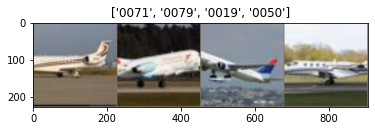

In [ ]:
# Visualize a few images
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### 1.1b

In [ ]:
# Following codes run on V100 GPU on GCP. Logs and output files attached.

In [ ]:
aircraft_path = "/home/as6608/hw4/q1/aircraft"

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(aircraft_path, x), data_transforms[x]) for x in ['train']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64, shuffle=True, num_workers=4) for x in ['train']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train']}
print("Dataset sizes:", dataset_sizes)

class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, scheduler, num_epochs):
    training_logs = []
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # training_logs = pd.DataFrame(columns=['epoch_num', 'loss', 'acc'])

    print("training started")
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            training_logs.append([epoch, epoch_loss, epoch_acc.item()])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'train' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, training_logs

model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 60 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=60, gamma=0.1)

model_ft, train_logs = train_model(model_ft, criterion, optimizer_ft,exp_lr_scheduler, num_epochs=200)
train_logs_df = pd.DataFrame(train_logs, columns =['epoch_num', 'loss', 'acc'])
train_logs_df.to_csv("/home/as6608/hw4/q1/1.1/train_logs_0.001.csv", index=False)

**Accuracy achieved for decaying learning rate 0.001: 89.9%**

### 1.1c

In [ ]:
# lr_rate = 0.01 and lr_rate = 0.1

In [ ]:
aircraft_path = "/home/as6608/hw4/q1/aircraft"

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(aircraft_path, x), data_transforms[x]) for x in ['train']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64, shuffle=True, num_workers=4) for x in ['train']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train']}
print("Dataset sizes:", dataset_sizes)

class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, num_epochs=200):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_logs = pd.DataFrame(columns=['epoch_num', 'train_loss', 'train_accuracy'])

    print("training started")
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'train' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            train_logs.append([epoch, epoch_loss, epoch_acc.item()])

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_logs



model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
lr_rate = 0.01
print("lr:", lr_rate)
optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr_rate, momentum=0.9)

model_ft, train_logs = train_model(model_ft, criterion, optimizer_ft, num_epochs=200)

train_logs_df = pd.DataFrame(train_logs, columns =['epoch_num', 'loss', 'acc'])
train_logs_df.to_csv(f"/home/as6608/hw4/q1/1.1/train_logs_{lr_rate}.csv", index=False)

**Accuracy achieved for uniform learning rate 0.01: 94.42%**

**Accuracy achieved for uniform learning rate 0.1: 92.17%**

Finetuning the base model: From the 3 models, the best accuracy is achieved with learning rate of 0.01 for all layers.

### 1.2a

In [ ]:
# lr_rate = 1, 0.1, 0.01, and 0.001

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './aircraft/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train']}
print(type(image_datasets))

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=1)
              for x in ['train']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train']}
print("Dataset sizes:", dataset_sizes)

class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, num_epochs=200):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_logs = pd.DataFrame(columns=['epoch_num', 'train_loss', 'train_accuracy'])

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'train' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            train_logs = train_logs.append(pd.Series([epoch, epoch_loss, epoch_acc.item()], 
                                  index = train_logs.columns), 
                                  ignore_index=True)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_logs



model_conv = models.resnet50(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
lr_rate = 0.01
print("lr:", lr_rate)
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=lr_rate, momentum=0.9)

model_conv, train_logs = train_model(model_conv, criterion, optimizer_conv, num_epochs=200)

train_logs_df = pd.DataFrame(train_logs, columns =['epoch_num', 'loss', 'acc'])
train_logs_df.to_csv(f"2a_train_logs_{lr_rate}.csv",index=False)

**Accuracy achieved for last layer learning rate 0.001: 28.5%**

**Accuracy achieved for last layer learning rate 0.01: 39.1%**

**Accuracy achieved for last layer learning rate 0.1: 37%**

**Accuracy achieved for last layer learning rate 1: 33.2%**

Base model as fixed feature extractor: The best accuracy is achieved with learning rate 0.01.

Stats for all models:

1.1b
Training complete in 41m 38s
Best val Acc: 0.898920

1.1c 0.01
Training complete in 69m 36s
Best val Acc: 0.944211

1.1c 0.1
Training complete in 69m 36s
Best val Acc: 0.921716


2a 0.001
Training complete in 58m 25s
Best val Acc: 0.285843

2a 0.01
Training complete in 58m 24s
Best val Acc: 0.391122

2a 0.1
Training complete in 60m 11s
Best val Acc: 0.370126

2a 1
Training complete in 59m 21s
Best val Acc: 0.332933

In terms of final accuracy, training loss and training time - **Finetuning the base model** using **uniform learning rate of 0.01** for all layers is the best approach.

This could be because the features extracted by pretrained resnet50 may not be suitable for this dataset. Hence, retraining the complete model from scratch produces better results. Uniform learning rate of 0.01 performs better than 0.1 which is too high and 0.001 which is too low in this problem.

### Problem 2

In [ ]:
# 2.1

Semi-supervised learning is a type of machine learning that sits between supervised and unsupervised learning. It refers to a learning problem (and algorithms designed for the learning problem) that involves a small portion of labeled examples and a large number of unlabeled examples from which a model must learn and make predictions on new examples.

Weak supervision is a branch of machine learning where noisy, limited, or imprecise sources are used to provide supervision signal for labeling large amounts of training data in a supervised learning setting. Inexpensive weak labels are employed with the understanding that they are imperfect, but can nonetheless be used to create a strong predictive model.

Both the approaches use the same 1B images for different pretraining as weakly-supervised pretraining uses hashtag as the label-signal, but in semi-supervised pretraining we don’t rely only on hashtag alone, but use a teacher model to label the examples.

In [ ]:
# 2.2

a) The model trained on large-scale hashtag data is unexpectedly robust to label noise. The features learned allow a simple linear classifier to achieve state-of-the-art ImageNet-1k top-1 accuracy of 83.6% without any finetuning (compared to 84.2% with finetuning). To study the effect of hashtag label noise on model accuracy, they investigate the effect
of injecting additional label noise on the accuracy of their networks. To do so, they pretrained ResNeXt-101 32×16d networks on a version of IG-1B-17k in which they randomly replaced p% of the hashtags by hashtags obtained by sampling from the marginal distribution over hashtags (excluding the tag to be replaced).

**Results:**

They observe that the noise level of p = 10% leads to a loss of less than 1% in classification accuracy, and at p = 25% label noise, the reduction in accuracy is around 2%. These results suggest that label noise may be a limited issue if networks are trained on a billion images.

b) Hashtags are governed by a Zipfian distribution. Resampling of hashtag distribution is important during pretraining for transfer learning because prior studies in language modeling found that resampling Zipfian distributions reduces the impact of the head of the word distribution on the overall training loss. For example, in the 17k hash-tag vocabulary, the most frequent hashtag (#fineart) appears more than 1 million times as often as the least frequent hashtag (#shirtfront). Training on the natural distribution may not be optimal. Therefore the authors consider two alternative ways to sample: uniform and square root. 

The results show that resampling of the hashtag distribution is important in order to obtain good transfer to ImageNet image-classification tasks: using uniform or square-root sampling leads to an accuracy improvement of 5 to 6% irrespective of the number of ImageNet classes in the transfer task.

In [ ]:
# 2.3

a) The authors first train on the labeled data to get an initial teacher model. For each class/label, they use the predictions of this teacher model to rank the unlabeled images and pick top-K images to construct a new training data. They use this data to train a student model, which typically is smaller than the teacher model. Finally, pre-trained student model is fine-tuned on the initial labeled data to circumvent potential labeling errors.

Distillation was originally introduced to compress a large
model, called the teacher, into a smaller one. The
distillation procedure amounts to training the small model
(the student) such that it reproduces at best the output of
the teacher. The student model is typically smaller and
faster than the teacher model. Distillation can be seen as
a particular case of self-training, in that the teacher model
makes prediction on unlabelled data, and the inferred labels
are used to train the student in a supervised fashion. In this way, the authors mimic the distillation process to do teacher-student modeling.

b) P = number of relevant classes occuring in each image predicted by the teacher model. For each image, the authors take the P highest confidence classes to be included for the next step.

Then, for each class , the authors rank the images based on the
corresponding classification scores. K is the parameter describing the number of top image candidates for each class.

The reason for choosing P > 1 is that it is diﬀicult to identify accurately under-represented concepts, or some may be occulted by more prominent co-occurring concepts. Hence, the wanted to include atleast 2 classes for the next step.

c) A teacher model is trained on labeled data. It is then run on unlabeled data and relevant examples for each label are selected to construct a
new labeled dataset. This new labeled dataset is used to train a student model.

Since P(number of relevant classes occuring in each image predicted by the teacher model) > 1, an image in this new dataset can belong to more than one class.

d) The performance first improves as they increase the value of K to 8k due to increase in diversity as well as hardness of examples.

It remains stable in a broad 4k-32k regime indicating that a coarse sweep to find the optimal value is sufficient. 

Accuracy drops on increasing K further as it introduces a lot of labeling noise in the training data.

### Problem 3

In [ ]:
# 3.1

Achieving peak FLOPs from hardware devices like GPUs is a difficult propostion in real systems because it usually requires customized libraries developed by organizations with intimate knowledge of the underlying hardware, e.g., Intel’s MKL (int, 2009). Even these specially tuned libraries may fall short of peak execution. Further, any computation done outside the scope of PALEO (e.g. job scheduling) will exacerbate the observed inefficiency in practice. 

Platform percent of peak (PPP) parameter helps to capture the average relative inefficiency of the platform compared to peak FLOPS. Rather than trying to measure and capture every source of inefficiency in every learning framework, we take a small number of representative deep learning workloads which contain convolutions, pooling, dropout, and fully connected layers and run them for a short time on a single GPU. Given observed total throughput and estimated total throughput on this benchmark we fit a scaling constant
to estimate PPP.

In [ ]:
# 3.2

Getting model summary to know vgg19 layers:

In [ ]:
from keras.applications.vgg19 import VGG19

model = VGG19(input_shape=(224,224,3))
model.summary()

574710816/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

## **Flops formulae:**

**FLOPs in convolution layer= 2 ∗ (H_in * W_in * C_in) * K ^ 2)* C_out**

where (H_in * W_in * C_in) is Input shape

K^2 is Kernel size

C_out is no. of channels in Output shape

---------------
**FLOPs in Pooling Layers = H_in * W_in * C_in***

---------------

**FLOPs in Fully connected layer = 2 * (H_in * W_in * C_in) * (H_out * W_out * C_out)**



On solving, here are the outputs:

               Layer Name |      Input Shape |     Output Shape |      Kernel Size |          Filters | Stride |  FLOPS
                  input_1 |    [224, 224, 3] |    [224, 224, 3] |           [0, 0] |           [0, 0] | [1, 1] | 0.0000
             block1_conv1 |    [224, 224, 3] |   [224, 224, 64] |           (3, 3) |               64 | (1, 1) | 173408256.0000
             block1_conv2 |   [224, 224, 64] |   [224, 224, 64] |           (3, 3) |               64 | (1, 1) | 3699376128.0000
              block1_pool |   [224, 224, 64] |     ['', '', ''] |           (2, 2) |           [0, 0] | (2, 2) | 3211264.0000
             block2_conv1 |   [112, 112, 64] |  [112, 112, 128] |           (3, 3) |              128 | (1, 1) | 1849688064.0000
             block2_conv2 |  [112, 112, 128] |  [112, 112, 128] |           (3, 3) |              128 | (1, 1) | 3699376128.0000
              block2_pool |  [112, 112, 128] |     ['', '', ''] |           (2, 2) |           [0, 0] | (2, 2) | 1605632.0000
             block3_conv1 |    [56, 56, 128] |    [56, 56, 256] |           (3, 3) |              256 | (1, 1) | 1849688064.0000
             block3_conv2 |    [56, 56, 256] |    [56, 56, 256] |           (3, 3) |              256 | (1, 1) | 3699376128.0000
             block3_conv3 |    [56, 56, 256] |    [56, 56, 256] |           (3, 3) |              256 | (1, 1) | 3699376128.0000
             block3_conv4 |    [56, 56, 256] |    [56, 56, 256] |           (3, 3) |              256 | (1, 1) | 3699376128.0000
              block3_pool |    [56, 56, 256] |     ['', '', ''] |           (2, 2) |           [0, 0] | (2, 2) | 802816.0000
             block4_conv1 |    [28, 28, 256] |    [28, 28, 512] |           (3, 3) |              512 | (1, 1) | 1849688064.0000
             block4_conv2 |    [28, 28, 512] |    [28, 28, 512] |           (3, 3) |              512 | (1, 1) | 3699376128.0000
             block4_conv3 |    [28, 28, 512] |    [28, 28, 512] |           (3, 3) |              512 | (1, 1) | 3699376128.0000
             block4_conv4 |    [28, 28, 512] |    [28, 28, 512] |           (3, 3) |              512 | (1, 1) | 3699376128.0000
              block4_pool |    [28, 28, 512] |     ['', '', ''] |           (2, 2) |           [0, 0] | (2, 2) | 401408.0000
             block5_conv1 |    [14, 14, 512] |    [14, 14, 512] |           (3, 3) |              512 | (1, 1) | 924844032.0000
             block5_conv2 |    [14, 14, 512] |    [14, 14, 512] |           (3, 3) |              512 | (1, 1) | 924844032.0000
             block5_conv3 |    [14, 14, 512] |    [14, 14, 512] |           (3, 3) |              512 | (1, 1) | 924844032.0000
             block5_conv4 |    [14, 14, 512] |    [14, 14, 512] |           (3, 3) |              512 | (1, 1) | 924844032.0000
              block5_pool |    [14, 14, 512] |     ['', '', ''] |           (2, 2) |           [0, 0] | (2, 2) | 100352.0000
                  flatten |      [7, 7, 512] |            25088 |           [0, 0] |           [0, 0] | [1, 1] | 0.0000
                      fc1 |            25088 |           [4096] |           [0, 0] |           [0, 0] | [1, 1] | 205520896.0000
                      fc2 |             4096 |           [4096] |           [0, 0] |           [0, 0] | [1, 1] | 33554432.0000
         (predictions)fc3 |             4096 |           [1000] |           [0, 0] |           [0, 0] | [1, 1] | 8192000.0000

Total FLOPS = 39270246400.0 = 39270.24640000 x 10^6

Therefore, fraction of the total FLOPs attributed by convolution layers = 39016857600/39270246400  = 0.99354 or 99.35%.

In [ ]:
# 3.3

The measured time and sum of layerwise timings for forward pass did not match on GPUs because CUDA supports asynchronous programming. Before time measurement, an API(cudaDeviceSynchronize) has to be called to make sure that all cores have finished their tasks. This explicit synchronization is the overhead of measuring time on the GPUs. Therefore, the sum of layerwise timing on GPUs is longer than a full forward pass.

Sec. 5 of the paper to mitigate the measurement overhead in GPUs: To benchmark a matrix multiplication, the authors kept GPUs iteratively running the matrix multiplication in a way that GPU cores can continuously perform multiply-add operations without synchronization, before recording the end time. Then, the measurement overhead is amortized over all the iterations, giving accurate timing estimates. When the number of iterations is large enough, the overhead is negligible. In their experiments, the authors measure the timing of a large number of computing iterations on a matrix multiplication and use the averaged value of each iteration as the compute time of the matrix multiplication.

In [ ]:
# 3.4

**Flops**: 

VGG16 -> 15503M

Googlenet -> 1606M

Resnet50 -> 3922M

**Forward pass double-precision floating point performance (board):**


**Inference time:**

VGG16 ->  15503 * 10**−6/ 1.87 = 0.008s 

Googlenet -> 1606 * 10**−6/ 1.87 = 0.00086s 

Resnet50 -> 3922 * 10**−6/ 1.87 = 0.0021s

**Peak throughput:**

VGG16 -> 1/0.008 = 125 images/s 

Googlenet -> 1/0.00086 = 1163 images/s 

Resnet50 -> 1/0.0021 = 476 images/s


**Forward pass single-precision floating point performance (board):**

**Inference time**:

VGG16 -> 15503 * 10**−6/ 5.6 = 0.0027s 

Googlenet ->  1606 * 10**−6/ 5.6 = 0.00029s 

Resnet50 -> 3922 * 10**−6/ 5.6 = 0.0007s

**Peak throughput:**

VGG16 ->  1/0.0027 = 370.37 images/s 

Googlenet -> 1/0.00029 = 3448.28 images/s 

Resnet50 -> 1/0.0007 = 1428.6 images/s

###Problem 4

In [ ]:
# 4.1

15 models run on GCP by Ayushi Sharma, Peter Davis, Ria Gupta, Ashutosh Sameer. Logs and output files attached.

In [ ]:
q4_runs_data = "/content/gdrive/My Drive/q4_pdl_data/pdl-q4"

In [ ]:
# outlier removal
'''From the paper: For better model fitting, we carry out outlier removal as follows: if a loss data point does not fall within a certain 
range of its neighbours (e.g., between the minimum loss in subsequent 5 epochs and the maximum loss in previous 5 epochs), we consider the 
data point as an outlier, and use the average value of its neighbours to replace this point when doing model fitting. We also normalize the
loss values, by dividing each raw value by the maximum loss value collected so far (typically the first loss value).'''

def remove_outliers(loss_list):
    norm_loss_list, prev_max_loss = [], loss_list[0]
    for idx, loss in enumerate(loss_list):
        min_idx = max(idx - 5, 0)
        max_idx = min(idx + 5, len(loss_list) - 1)
        neighbours = []
        max_neighbour = loss
        min_neighbour = loss
        dr_for_avg = 0
        nr_for_avg = 0
        
        for tmp_idx in range(min_idx, max_idx + 1):
            if tmp_idx == idx:
                continue
            nr_for_avg += loss_list[tmp_idx]
            dr_for_avg += 1
            if loss_list[tmp_idx] < min_neighbour:
                min_neighbour = loss_list[tmp_idx]
            if loss_list[tmp_idx] > max_neighbour:
                max_neighbour = loss_list[tmp_idx]
        
        if loss > min_neighbour and loss < max_neighbour:
            new_loss = loss
        else:
            new_loss = nr_for_avg * 1.0 / dr_for_avg
        
        if new_loss > prev_max_loss:
            prev_max_loss = new_loss
            
        norm_loss_list.append(new_loss * 1.0/ prev_max_loss)
    return norm_loss_list

In [ ]:
def get_beta(k, b0, b1, b2):
    return (1.0/ (k*b0 + b1)) + b2

def get_epochs(loss, b0, b1, b2):
    return (((1.0 / (loss - b2))  - b1) * 1.0 / b0)

In [ ]:
models = ['resnet18', 'resnet20', 'resnet32', 'resnet44', 'resnet56']
gpus = ['K80', 'V100', 'P100']
file_names = [(x, y) for x in models for y in gpus]
beta_list = []

for model, gpu in file_names:
    file = model + "_" + gpu + ".csv"
    file_path = q4_runs_data+"/"+gpu+"/"+file
    model_hist_df = pd.read_csv(file_path)
    model_hist_df.columns = ['epoch', 'loss', 'acc', 'time']
    model_hist_df['loss'] = remove_outliers(model_hist_df['loss'].tolist())
    model_hist_df['epoch'] = model_hist_df['epoch'] / 350.0
    
    popt, pcov = curve_fit(get_beta, model_hist_df['epoch'], model_hist_df['loss'])

    layers = model[-2:]
    beta_list.append([layers, gpu, popt[0], popt[1], popt[2]])

In [ ]:
beta_df = pd.DataFrame(beta_list, columns = ['layers', 'gpu', 'b0', 'b1', 'b2'])

In [ ]:
print(" (β0, β1, β2) for K80:")
beta_df[beta_df['gpu'] == 'K80'].sort_values(by=['layers'])

 (β0, β1, β2) for K80:


,layers,gpu,b0,b1,b2
0,18,K80,65.006491,1.557065,-0.030773
3,20,K80,1.408045,1.014911,-0.243009
6,32,K80,0.904105,0.796651,-0.587309
9,44,K80,1.532558,0.848139,-0.450469
12,56,K80,1.645923,0.857889,-0.425212


In [ ]:
print(" (β0, β1, β2) for V100:")
beta_df[beta_df['gpu'] == 'V100'].sort_values(by=['layers'])

 (β0, β1, β2) for V100:


,layers,gpu,b0,b1,b2
1,18,V100,3.351033,1.383752,-0.057551
4,20,V100,1.563486,1.015027,-0.217002
7,32,V100,1.286499,0.921485,-0.455677
10,44,V100,1.142487,0.793518,-0.531955
13,56,V100,1.726945,0.898947,-0.403234


In [ ]:
print(" (β0, β1, β2) for P100:")
beta_df[beta_df['gpu'] == 'P100'].sort_values(by=['layers'])

 (β0, β1, β2) for P100:


,layers,gpu,b0,b1,b2
2,18,P100,1.847649,1.101220,-0.182117
5,20,P100,1.272407,0.978101,-0.298647
8,32,P100,0.607718,0.680788,-0.755619
11,44,P100,1.362453,0.836773,-0.481315
14,56,P100,1.621734,0.887262,-0.414416


In [ ]:
# 4.2

In [ ]:
le = LabelEncoder()
le.fit(beta_df['gpu'])
beta_df['gpu'] = le.transform(beta_df['gpu'])

In [ ]:
X = beta_df[['layers', 'gpu']].values
y = beta_df[['b0', 'b1', 'b2']].values
rf_clf = RandomForestRegressor(max_depth=2, random_state=42)

rf_clf.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=42)

Predicted epoch: 235, Actual epoch:190


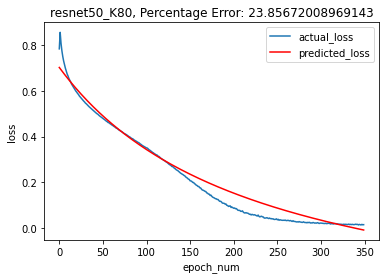

In [ ]:
q4b_runs_data = "/content/gdrive/My Drive/pdl-q4/q4-2-resnet50"
model = "resnet50"

gpu = 'K80'
file = model + "_" + gpu + ".csv"
file_path = q4b_runs_data+"/"+file
model_hist_df = pd.read_csv(file_path)
model_hist_df.columns = ['epoch', 'loss', 'acc', 'time']
model_hist_df['loss'] = remove_outliers(model_hist_df['loss'].tolist())
model_hist_df['epoch'] = model_hist_df['epoch'] / 350.0

if sum(model_hist_df.acc > 0.92) > 0:
    actual_epochs = model_hist_df.loc[np.where(model_hist_df.acc > 0.92)[0][0], 'epoch']
    actual_loss = model_hist_df.loc[np.where(model_hist_df.acc > 0.92)[0][0], 'loss']
else:
    actual_epochs = model_hist_df.iloc[-1]['epoch']
    actual_loss = model_hist_df.iloc[-1]['loss']

pred_X = np.array([50, le.transform([gpu])[0]]).reshape(1,-1)
beta_list = rf_clf.predict(pred_X)
b0, b1, b2 = beta_list[0][0], beta_list[0][1], beta_list[0][2]

predicted_epochs = get_epochs(actual_loss, b0, b1, b2)
                              
error = ((predicted_epochs - actual_epochs) / actual_epochs) * 100

print(f"Predicted epoch: {round(predicted_epochs * 350)}, Actual epoch:{round(actual_epochs * 350)}")

plt.plot(model_hist_df['loss'], label = "actual_loss")
plt.plot(f(model_hist_df['epoch'], b0, b1, b2), 'r-', label='predicted_loss')
plt.title("resnet50_" + gpu + ", Percentage Error: {}".format(error))
plt.xlabel('epoch_num')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.close()  

In [ ]:
# 4.3

In [ ]:
pred_epochs = 235
M = 128
theta0 = 1.02
theta1 = 2.78
theta2 = 4.92
theta3 = 0
theta4 = 0.02

def time_taken(p, w):
  return 1 / (theta0 * M/w + theta1 + theta2 * w/p + theta3*w + theta4*p)
  # w * 1/(theta0 + theta1 * (w/p) + theta2*w + theta3*p)

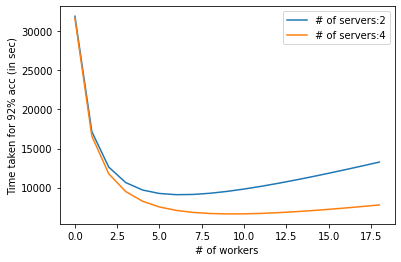

In [ ]:
for p in [2, 4]:
    steps_per_second = [time_taken(p,w) for w in range(1, 20)]  
    
    time = [pred_epochs * 1/s for s in steps_per_second]
    plt.plot(time, label = f"# of servers:{p}")

plt.ylabel("Time taken for 92% acc (in sec)")
plt.xlabel("# of workers")
plt.legend()
plt.show()